In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("credit_card_clustering.csv")

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
# just some cleaning because this column has NaN's
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)
np.any(np.isnan(data['CREDIT_LIMIT']))

False

In [6]:
# just used this template to check the data
data['BALANCE'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
10%         23.575529
20%         77.238026
30%        207.176552
40%        467.021989
50%        873.385231
60%       1207.815587
70%       1698.588855
80%       2571.434263
90%       4338.563657
max      19043.138560
Name: BALANCE, dtype: float64

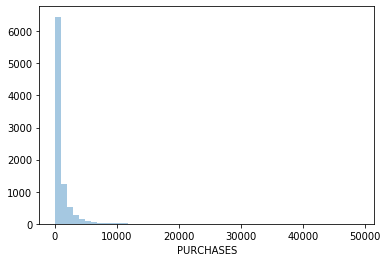

In [7]:
# ..and check the distribution
sns.distplot(data['PURCHASES'], kde=False)

In [8]:
from sklearn.cluster import KMeans

In [9]:
# chose this features because for me they're "similar"/related, and of the same unit
features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
X = data[features]
X.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS
0,40.900749,95.40,0.00,95.4,0.000000,1000.0,201.802084
1,3202.467416,0.00,0.00,0.0,6442.945483,7000.0,4103.032597
2,2495.148862,773.17,773.17,0.0,0.000000,7500.0,622.066742
3,1666.670542,1499.00,1499.00,0.0,205.788017,7500.0,0.000000
4,817.714335,16.00,16.00,0.0,0.000000,1200.0,678.334763


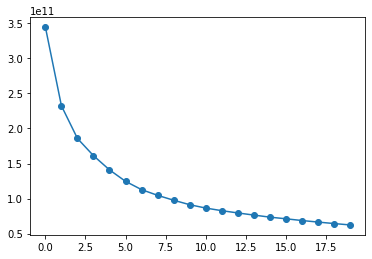

In [10]:
# get the sum of squared errors and find where the reduction of the errors are saturated with the increase of k
squared_errors = []

for num_iter in range(1,21):
    
  km = KMeans(n_clusters=num_iter, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)

# check for the best k to use
plt.plot(squared_errors, marker = 'o')

In [11]:
# Clustering using KMeans. 6 clusters seem to be good
km = KMeans(n_clusters=6, random_state=42)

# Fit data to model
km.fit(X)

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

# Clusters

### Cluster 0 [good customers]
- second highest amount of purchase in general but with little cash advance and huge payments!
- I'd say this is group hosts potentially good customers

In [12]:
# Cluster 0
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,labels
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.0
mean,2503.123392,6374.442181,4260.999096,2115.038830,557.595885,8377.127660,6355.785777,0.0
std,2513.396027,2902.453602,2671.129245,2532.848587,1244.069071,3680.836245,2981.881472,0.0
min,0.000000,1200.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,0.0
25%,646.457957,4398.575000,2456.242500,448.137500,0.000000,6000.000000,4199.251615,0.0
50%,1577.819693,5656.160000,3810.095000,1417.045000,0.000000,7550.000000,5768.664016,0.0
75%,3436.852917,7985.475000,5754.160000,2778.995000,245.642688,10500.000000,7968.432421,0.0
max,15244.748650,22500.000000,14215.000000,22500.000000,7540.307350,23000.000000,16826.424430,0.0


### Cluster 1 [kinda casual users]
- second lowest purchases made
- I'd say not a frequent user

In [13]:
# Cluster 1 
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,labels
count,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.0
mean,1704.219040,965.825165,552.020886,413.975618,986.977658,6405.174374,1651.611338,1.0
std,1669.645439,1054.100465,765.511494,634.745935,1588.025932,1726.003561,1513.395705,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,3000.000000,0.000000,1.0
25%,169.711096,88.107500,0.000000,0.000000,0.000000,5000.000000,641.618296,1.0
50%,1257.056966,583.310000,206.465000,110.105000,0.000000,6000.000000,1164.664031,1.0
75%,2919.261240,1499.985000,850.500000,591.250000,1545.394310,7500.000000,2167.066872,1.0
max,6256.556896,5671.860000,4674.210000,4313.220000,9579.677222,12000.000000,10893.778440,1.0


### Cluster 2 [really casual users]
- lowest in all aspects
- yet most customers fall under this category
- very, very infrequently uses their credit card

In [14]:
# Cluster 2
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,labels
count,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.0
mean,769.688517,495.477082,237.466714,258.313668,460.240416,2095.785085,870.839570,2.0
std,780.042494,680.627975,493.450519,433.409385,827.063799,986.521295,953.829060,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,2.0
25%,70.971097,12.165000,0.000000,0.000000,0.000000,1200.000000,279.746820,2.0
50%,536.635669,247.790000,0.000000,66.250000,0.000000,1950.000000,542.791608,2.0
75%,1238.072457,658.397500,233.655000,356.395000,614.169593,3000.000000,1111.063101,2.0
max,4028.036480,5065.830000,4768.270000,4249.920000,6718.127621,4800.000000,9858.055448,2.0


### Cluster 3 [loaners]
- medium purchases but highest cash advance
- second highest payment
- more of a loaner, but they might not be a problem because they make high payments

In [15]:
# Cluster 3
cluster_3 = new_data[new_data['labels']==3]
cluster_3.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,labels
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.00000,155.000000,155.0
mean,4821.186419,1108.839032,628.391806,480.589161,9900.815268,9732.28739,13410.720186,3.0
std,3069.093470,2008.247293,1228.912422,1169.093196,6275.495632,3845.30969,6814.018014,0.0
min,4.382924,0.000000,0.000000,0.000000,0.000000,1200.00000,5171.793236,3.0
25%,2563.165402,0.000000,0.000000,0.000000,6627.229150,7000.00000,8703.431938,3.0
50%,4759.702370,117.000000,0.000000,0.000000,8983.561279,9000.00000,11192.804800,3.0
75%,6764.551981,1245.675000,596.035000,374.255000,12093.521685,12000.00000,16955.679555,3.0
max,14581.459140,11500.940000,6701.080000,8409.930000,47137.211760,21000.00000,40627.595240,3.0


### Cluster 4 [average joe's]
- generally similar with cluster 3 but with less cash advance and medium payments
- just right, I guess

In [16]:
# Cluster 4
cluster_4 = new_data[new_data['labels']==4]
cluster_4.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,labels
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.0
mean,5358.210863,1099.455392,663.875910,435.668393,2900.907231,11567.662683,2422.147228,4.0
std,3278.569783,1410.919321,990.917077,742.019695,2797.320222,3347.048375,1795.270573,0.0
min,0.488050,0.000000,0.000000,0.000000,0.000000,6000.000000,0.000000,4.0
25%,3360.689054,0.000000,0.000000,0.000000,0.000000,9000.000000,1302.793390,4.0
50%,5580.530306,480.010000,174.480000,37.030000,2510.352951,11000.000000,1891.669441,4.0
75%,7333.442833,1642.940000,1000.000000,587.460000,4599.625146,13500.000000,3014.036186,4.0
max,18495.558550,7465.910000,6075.620000,4872.600000,12702.427700,30000.000000,9542.247486,4.0


### Cluster 5 [shine bright like a diamond]
- higest purchases, balance, credit limit and payments
- really valuable but rare

In [17]:
# Cluster 5
cluster_5 = new_data[new_data['labels']==5]
cluster_5.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,labels
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0
mean,5405.330935,27276.363750,21877.102917,5399.260833,1550.378389,16083.333333,27925.634496,5.0
std,4317.955150,8585.708142,8649.208460,4754.823099,4884.159872,5571.017132,9111.539978,0.0
min,1268.809031,12551.950000,9449.070000,0.000000,0.000000,7500.000000,13002.303930,5.0
25%,2741.523040,21958.090000,15636.290000,905.647500,0.000000,12000.000000,22494.513405,5.0
50%,3422.898250,26008.730000,21224.335000,4828.500000,0.000000,17000.000000,26604.720780,5.0
75%,6817.133432,31609.457500,25470.657500,7874.782500,0.000000,18000.000000,32272.496227,5.0
max,19043.138560,49039.570000,40761.250000,15497.190000,19513.474830,30000.000000,50721.483360,5.0
